# netflix movies and TV shows analysis 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data= pd.read_csv('netflix_movies & tv shows.csv')

In [5]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Seasons,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Seasons,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


data cleaning 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

as we can see that the column director, cast, country , date_added has null values present in them

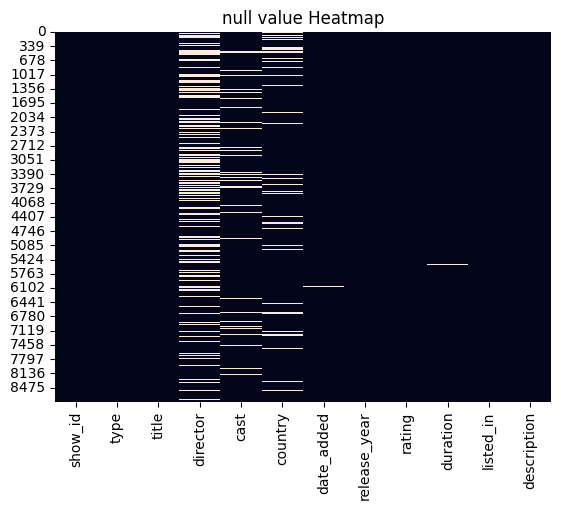

In [8]:
sns.heatmap(data.isnull(), cbar= False)
plt.title('null value Heatmap')
plt.show()

handling the null values 

In [9]:
data['director'].fillna('No Director', inplace = True)
data['cast'].fillna('No cast available', inplace = True)
data['country'].fillna('country unavailable', inplace = True)
data.dropna(subset=['date_added', 'rating','duration'], inplace= True)

In [10]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

As we can see that there are no more missing values 

In [11]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast available,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",country unavailable,24-Sep-21,2021,TV-MA,1 Seasons,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No cast available,country unavailable,24-Sep-21,2021,TV-MA,1 Seasons,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Splitting the dataset

Dataset contain data about the movies and TV shows so its better to split the data into movies and TV shows 

In [12]:
data_movies= data[data['type']=='Movie'].copy()
data_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast available,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",country unavailable,24-Sep-21,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",24-Sep-21,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,24-Sep-21,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",23-Sep-21,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",9-Mar-16,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20-Nov-19,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [13]:
data.shape

(8790, 12)

so your movies dataset contain 8790 rows and 12 columns

In [14]:
data_shows = data[data['type']=='TV Show'].copy()
data_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",country unavailable,24-Sep-21,2021,TV-MA,1 Seasons,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No cast available,country unavailable,24-Sep-21,2021,TV-MA,1 Seasons,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",country unavailable,24-Sep-21,2021,TV-MA,1 Seasons,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,No Director,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",1-May-18,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,No Director,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,17-Jan-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,No Director,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",13-Sep-18,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,No Director,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,15-Dec-16,2012,TV-PG,1 Seasons,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [15]:
data_shows.shape

(2664, 12)

so the Tv show scolumn contains 2664 rows and 12 columns

In [16]:
# Convert 'duration' column to string type 
data_movies['duration'] = data_movies['duration'].astype(str).str.replace('min', '').astype(int)
data_movies['duration'].inplace=True
# Replace 'Seasons' in 'duration' column for shows
data_shows['duration'] = data_shows['duration'].astype(str).str.replace('Seasons', '').astype(int)
data_shows['duration'].inplace=True

In [17]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6126 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6126 non-null   object
 1   type          6126 non-null   object
 2   title         6126 non-null   object
 3   director      6126 non-null   object
 4   cast          6126 non-null   object
 5   country       6126 non-null   object
 6   date_added    6126 non-null   object
 7   release_year  6126 non-null   int64 
 8   rating        6126 non-null   object
 9   duration      6126 non-null   int32 
 10  listed_in     6126 non-null   object
 11  description   6126 non-null   object
dtypes: int32(1), int64(1), object(10)
memory usage: 598.2+ KB


In [18]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast available,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",country unavailable,24-Sep-21,2021,TV-MA,1 Seasons,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No cast available,country unavailable,24-Sep-21,2021,TV-MA,1 Seasons,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Netflix Film Type : Moive or TV shows 

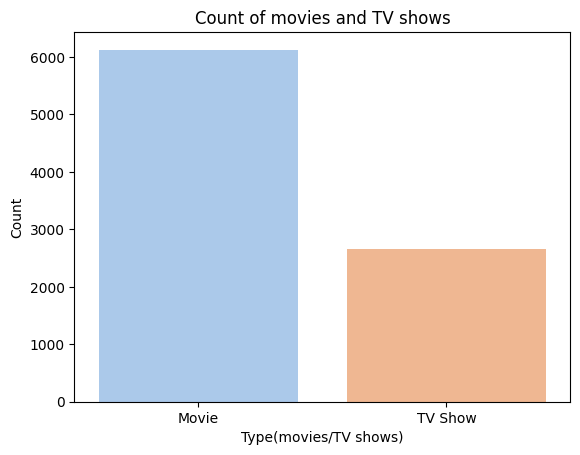

In [19]:

sns.countplot(data=data, x='type', palette ='pastel') 
plt.title('Count of movies and TV shows')
plt.xlabel('Type(movies/TV shows)')
plt.ylabel('Count')
plt.show()

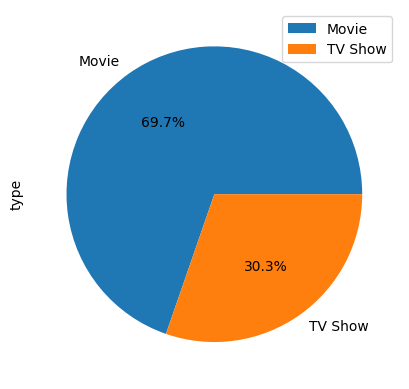

In [20]:
data['type'].value_counts().plot(kind='pie', autopct='%0.1f%%')
plt.legend()
plt.show()

So in the dataset there are around 69.7% movies and 30.3% of the TV shows

# Netflix Flims : rating

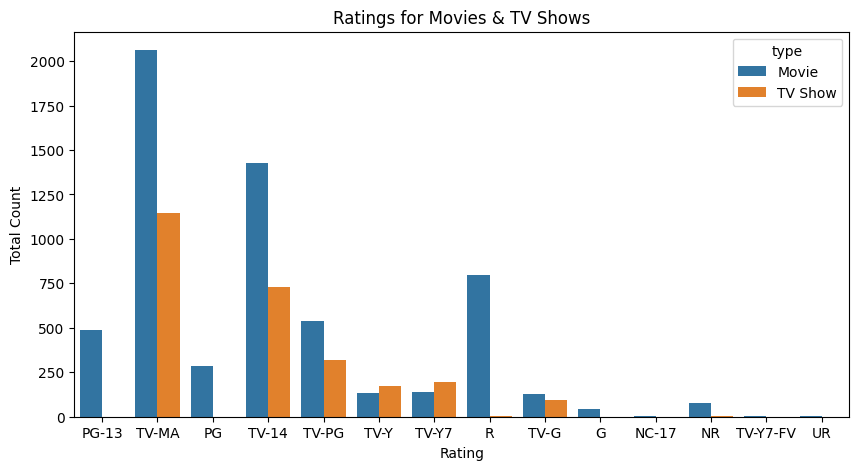

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(data= data, x= data.rating, hue= data.type)
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

In [22]:
Rating of movies

SyntaxError: invalid syntax (4168208131.py, line 1)

C:\Users\bhargavi\AppData\Local\Temp\ipykernel_7956\3386454258.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


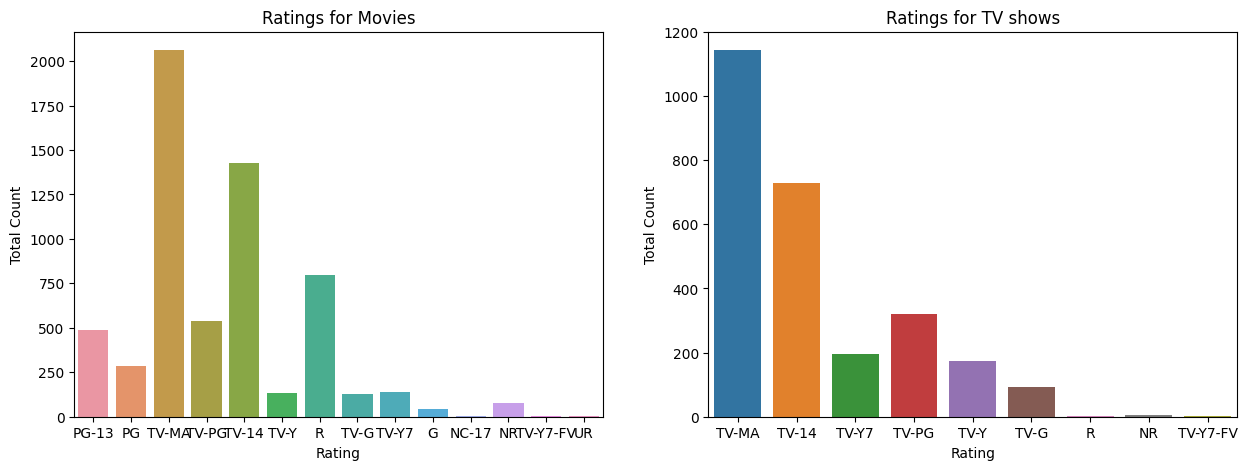

In [23]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
g1 =sns.countplot(data= data_movies, x= data_movies.rating, ax=ax[0])
g1.set_title("Ratings for Movies")
g1.set_xlabel("Rating")
g1.set_ylabel("Total Count")

g2= sns.countplot(data= data_shows, x= data_shows.rating, ax=ax[1])
g2.set_title("Ratings for TV shows")
g2.set_xlabel("Rating")
g2.set_ylabel("Total Count")
fig.show()

Overall, there is much more rating for mature content in both movie and Tv shows 

# creating a separate column for month and year from the date column

In [24]:
data['year_added'] = pd.DatetimeIndex(data['date_added']).year
data_movies['year_added'] = pd.DatetimeIndex(data_movies['date_added']).year
data_shows['year_added'] = pd.DatetimeIndex(data_shows['date_added']).year
data['month_added'] = pd.DatetimeIndex(data['date_added']).month
data_movies['month_added'] = pd.DatetimeIndex(data_movies['date_added']).month
data_shows['month_added'] = pd.DatetimeIndex(data_shows['date_added']).month

In [25]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast available,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",country unavailable,24-Sep-21,2021,TV-MA,1 Seasons,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,No Director,No cast available,country unavailable,24-Sep-21,2021,TV-MA,1 Seasons,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9


# Total content added year vise 

In [26]:
netflix_year = data[['type','year_added']]
movie_year = netflix_year[netflix_year['type']=="Movie"].year_added.value_counts().to_frame().reset_index().rename(columns={'index':'year','year_added': 'count'})
show_year =netflix_year[netflix_year['type']=='TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index':'year','year_added': 'count'})

In [27]:
nnetflix_year = data['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})

In [28]:
movie_year


,year,count
0,2019,1424
1,2020,1284
2,2018,1237
3,2021,993
4,2017,836
5,2016,251
6,2015,56
7,2014,19
8,2011,13
9,2013,6


In [29]:
show_year

,year,count
0,2020,595
1,2019,592
2,2021,505
3,2018,411
4,2017,349
5,2016,175
6,2015,26
7,2014,5
8,2013,5
9,2008,1


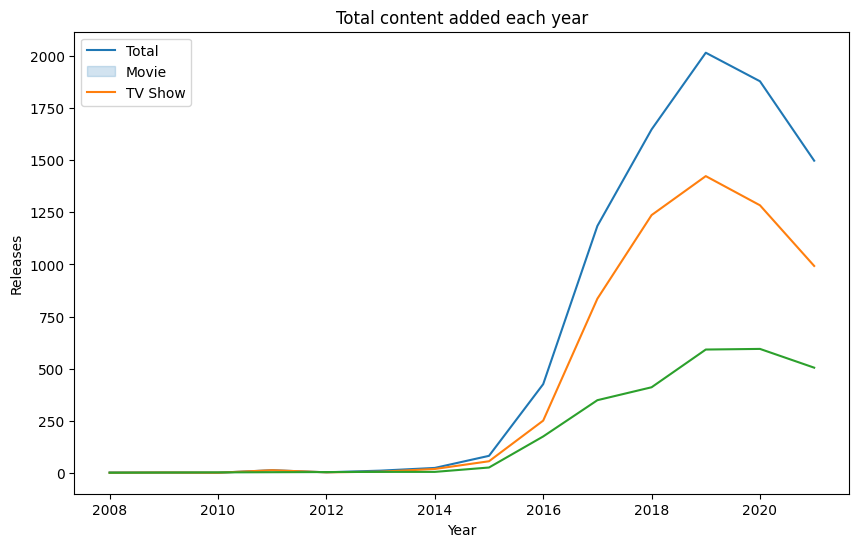

In [30]:
fig, ax =plt.subplots(figsize=(10,6))
sns.lineplot(data= nnetflix_year, x='year', y='count')
sns.lineplot(data= movie_year, x='year', y= 'count')
sns.lineplot(data= show_year, x='year' ,y='count')
plt.title("Total content added each year")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

 we can see that around 2014 is when Netflix began to increase their content count.

In [31]:
month_year = data.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T
month_year

year_added,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month_added,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,43.0,71.0,129.0,153.0,205.0,132.0
2,1.0,0.0,0.0,0.0,1.0,0.0,2.0,4.0,15.0,82.0,86.0,148.0,114.0,109.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,17.0,124.0,173.0,172.0,137.0,112.0
4,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,22.0,92.0,115.0,162.0,177.0,188.0
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,13.0,86.0,97.0,139.0,157.0,132.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,18.0,94.0,78.0,168.0,156.0,207.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,28.0,79.0,152.0,157.0,146.0,257.0
8,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,33.0,115.0,164.0,131.0,129.0,178.0
9,0.0,0.0,0.0,1.0,0.0,2.0,1.0,7.0,47.0,113.0,124.0,123.0,168.0,183.0


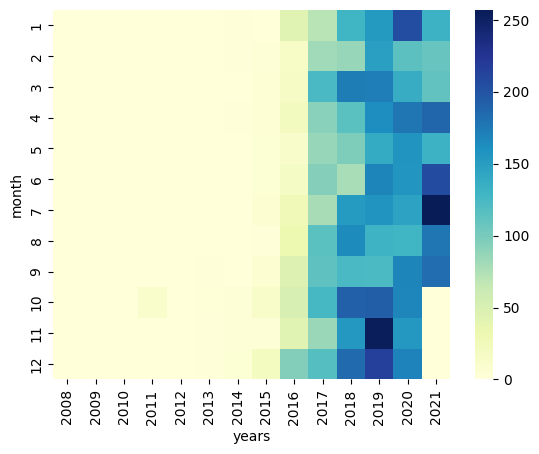

In [32]:
sns.heatmap(month_year, cmap="YlGnBu")
plt.xlabel('years')
plt.ylabel('month')
plt.show()

We can see over the years and months after 2014, Netflix continues to slowly increase the amount of content that is being added into their platform.

# Netflix film duration

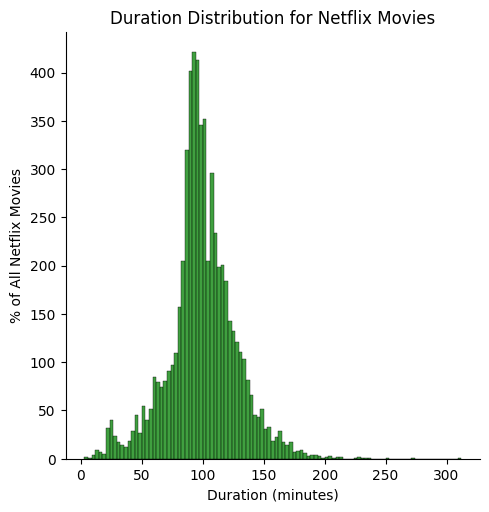

In [34]:

sns.displot(data_movies['duration'], color='green')
plt.title("Duration Distribution for Netflix Movies")
plt.ylabel("% of All Netflix Movies")
plt.xlabel("Duration (minutes)")
plt.show()

<Axes: >

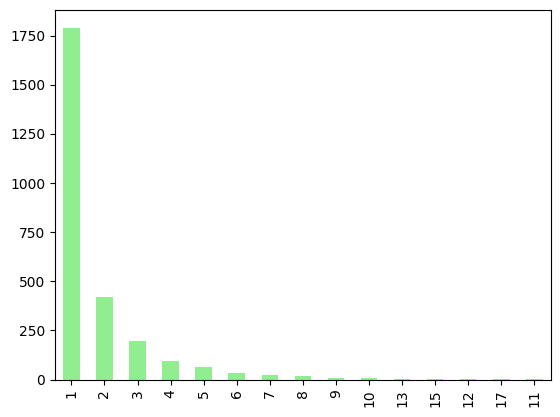

In [36]:
data_shows['duration'].value_counts().plot(kind='bar', color= 'lightgreen')

Since movies are measured in time and shows are measured by seasons, we need to split the dataset between movies and TV shows. Above on the left, we can see that the duration for Netflix movies closely resembles a normal distribution with the average viewing time spanning about 90 minutes which seems to make sense. Netflix TV shows on the other hand seems to be heavily skewed to the right where the majority of shows only have 1 season.

# countries with the most content available

In [37]:
data_country = data['country'].value_counts()

<Axes: >

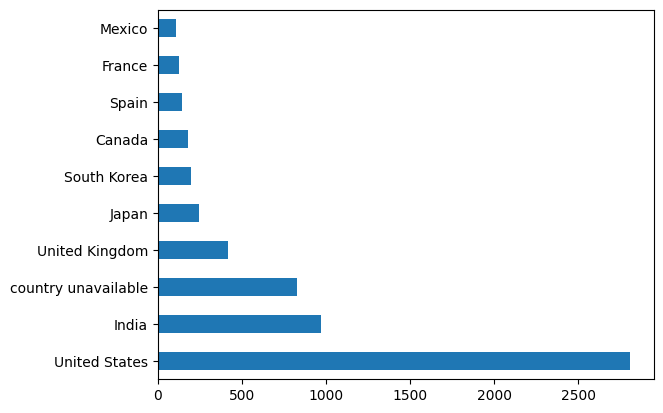

In [38]:
data_country = data['country'].value_counts()
data_country = data_country[data_country != 'country unavailable']
data_country.head(10).plot(kind='barh')

# Popular Genre

In [39]:
data_genre = data.listed_in.str.split(',', expand = True).stack().reset_index(level =1, drop=True)
data_genre.value_counts().head(20)

 International Movies       2624
Dramas                      1599
Comedies                    1210
Action & Adventure           859
Documentaries                829
 Dramas                      827
International TV Shows       773
 Independent Movies          736
 TV Dramas                   695
 Romantic Movies             613
Children & Family Movies     605
 International TV Shows      576
 Thrillers                   512
 Comedies                    464
 TV Comedies                 454
Crime TV Shows               399
Kids' TV                     385
 Music & Musicals            357
 Romantic TV Shows           338
Stand-Up Comedy              334
dtype: int64

<Axes: >

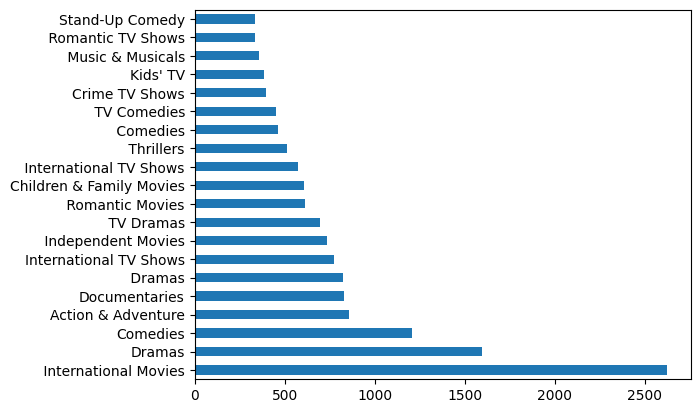

In [40]:
data_genre.value_counts().head(20).plot(kind='barh')

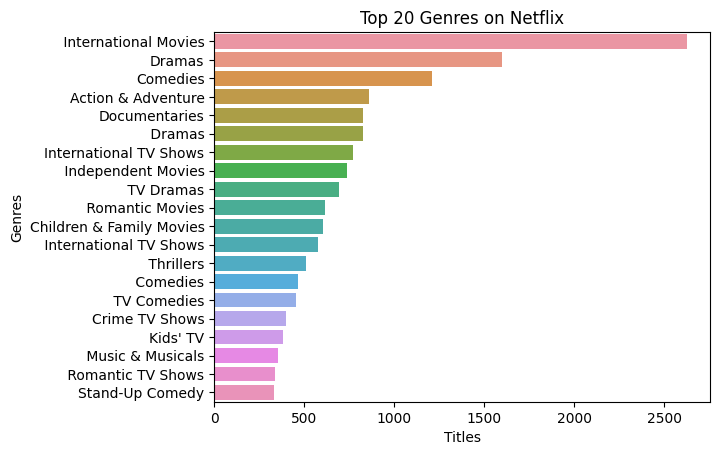

In [41]:
top_genre = data.set_index('title').listed_in.str.split(',', expand=True).stack().reset_index(level= 1, drop= True)

g= sns.countplot(y= top_genre, order=top_genre.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

In terms of genres, international movies takes the cake surprisingly followed by dramas and comedies

# To 10 director with the most released?

In [42]:
top_director = data[data['director']!='No Director'].director.str.split(',',expand= True ).stack().reset_index(level =1 , drop=True)
top_director

0       Kirsten Johnson
2       Julien Leclercq
5         Mike Flanagan
6         Robert Cullen
6        José Luis Ucha
             ...       
8801    Majid Al Ansari
8802      David Fincher
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
Length: 6974, dtype: object

<Axes: >

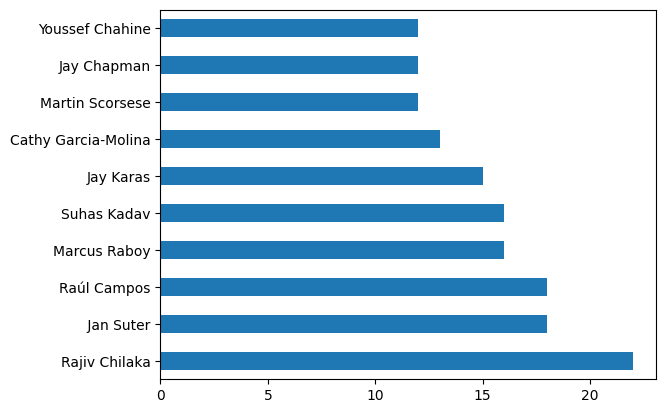

In [43]:
top_director.value_counts().head(10).plot(kind='barh')

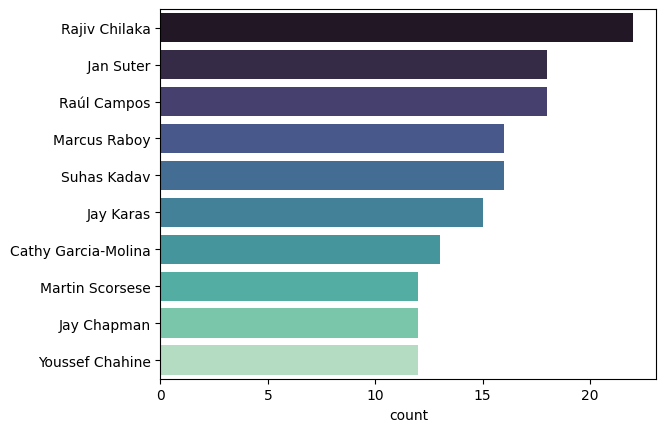

In [44]:
sns.countplot(y = top_director, order=top_director.value_counts().index[:10], palette='mako')
plt.show()

In [45]:
top 10 actors on netflix 

SyntaxError: invalid syntax (1834908124.py, line 1)

In [46]:
actor = data[data['cast']!= 'No cast available'].cast.str.split(',', expand =True).stack().reset_index(level=1, drop=True)
actor

1                   Ama Qamata
1                  Khosi Ngema
1                Gail Mabalane
1               Thabang Molaba
1             Dillon Windvogel
                 ...          
8806          Manish Chaudhary
8806              Meghna Malik
8806             Malkeet Rauni
8806            Anita Shabdish
8806     Chittaranjan Tripathy
Length: 64016, dtype: object

<Axes: >

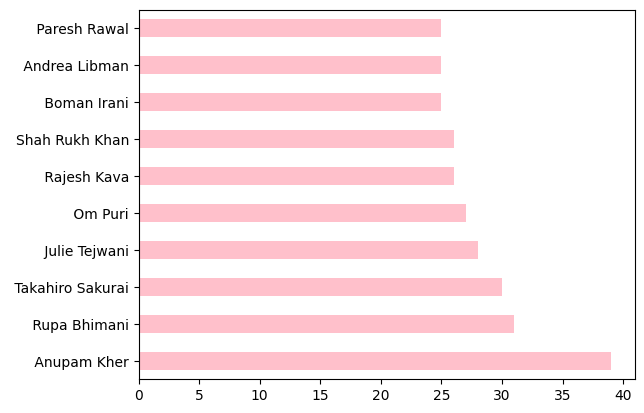

In [47]:
actor.value_counts().head(10).plot(kind='barh', color= 'pink')

<Axes: xlabel='count'>

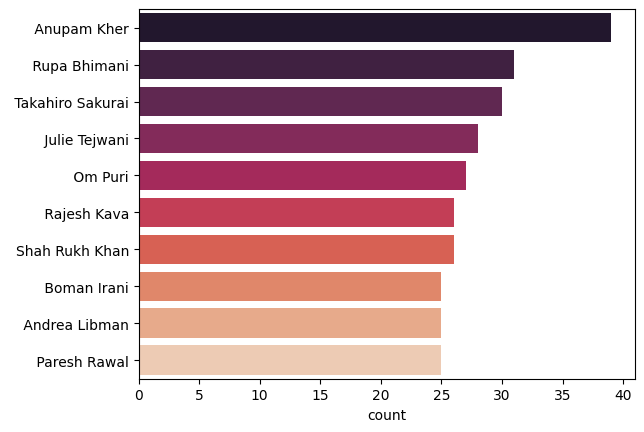

In [48]:
sns.countplot(y= actor , order= actor.value_counts().index[:10], palette='rocket')

AS from the graph we can see that anupam kher and rupa Bhimani are the top actors 